In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date #datetime as dt, date
from datetime import timedelta 
from pandas.plotting import table

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).\
    filter(measurement.date ==session.query(func.max(measurement.date))).\
    first()
recent_date


C:\Users\emjcr\anaconda3\envs\PythonData\lib\site-packages\sqlalchemy\sql\coercions.py:300: SAWarning: implicitly coercing SELECT object to scalar subquery; please use the .scalar_subquery() method to produce a scalar subquery.
  "implicitly coercing SELECT object to scalar subquery; "


('2017-08-23',)

In [10]:
# year_recent = recent_date() - recent_date.timedelta(days=365)
# year_recent

year_recent = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One year prior from the last date: ", year_recent)

One year prior from the last date:  2016-08-23


In [11]:
date = measurement.date.label("date")
precipitation = measurement.prcp.label("precipitation")


twelve = session.query(date, precipitation).\
    filter(date >= year_recent).order_by(date).all()

twelve

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [12]:
# Perform a query to retrieve the data and precipitation scores

twelve = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_recent).order_by(measurement.date).all()
twelve


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column


twelve2_df = twelve_df.rename(columns={0:'Date',1:'Precipitation'})
twelve2_df
twelve2_df.set_index("Date",inplace=True)
twelve2_df


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

one_year_prior = date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

twelve = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_recent).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
twelve_df = pd.DataFrame.from_records(twelve,index=0)
twelve2_df = twelve_df.rename(columns={0:'Date',1:'Precipitation'})

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




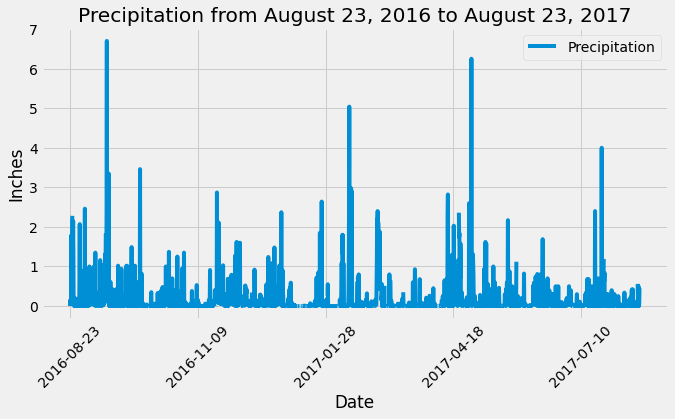

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data

twelve2_df.plot(figsize=(10,5), rot=45)
plt.ylabel("Inches")
plt.title("Precipitation from August 23, 2016 to August 23, 2017")
plt.show()


In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
twelve2_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
number = session.query(station).count()
print(f'The total number of stations in the dataset is {number}.')

The total number of stations in the dataset is 9.


In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active = session.query(measurement.station,func.count(measurement.tobs)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.tobs).desc()).all()
print("Most active stations:")

active_df = pd.DataFrame(active, columns = ['Station Name', 'Observation Count'])
active_df

Most active stations:


,Station Name,Observation Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = session.query(measurement.station).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).\
    limit(1).scalar()

max = session.query(func.max(measurement.tobs)).scalar()
min = session.query(func.min(measurement.tobs)).scalar()
avg = session.query(func.avg(measurement.tobs)).scalar()
avg = round(avg,2)

print(f'''The most active station is {temp}.
The minimum temperature is {min}.
The maximum temperature is {max}.
The average temperature is {avg}.''')



The most active station is USC00519281.
The minimum temperature is 53.0.
The maximum temperature is 87.0.
The average temperature is 73.1.


Text(0.5, -1.340000000000014, 'Temperature')

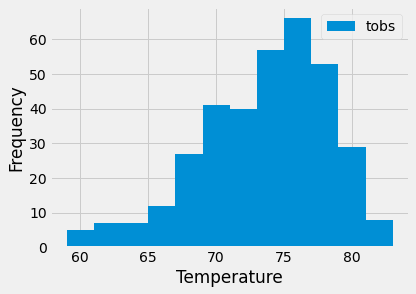

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

    
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])

df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

# Close session

In [23]:
# Close Session
session.close()